## Step 1: Importing Data

In [2]:
#Import the required libraries
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#Import data
cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')

In [8]:
#Have a look at the data:
print(cases.head())
print(deaths.head())

        UID iso2 iso3  code3    FIPS   Admin2 Province_State Country_Region  \
0  84001001   US  USA    840  1001.0  Autauga        Alabama             US   
1  84001003   US  USA    840  1003.0  Baldwin        Alabama             US   
2  84001005   US  USA    840  1005.0  Barbour        Alabama             US   
3  84001007   US  USA    840  1007.0     Bibb        Alabama             US   
4  84001009   US  USA    840  1009.0   Blount        Alabama             US   

         Lat      Long_  ... 5/6/22  5/7/22  5/8/22  5/9/22  5/10/22  5/11/22  \
0  32.539527 -86.644082  ...  15840   15840   15840   15846    15852    15853   
1  30.727750 -87.722071  ...  55730   55730   55730   55761    55792    55807   
2  31.868263 -85.387129  ...   5672    5672    5672    5675     5677     5677   
3  32.996421 -87.125115  ...   6444    6444    6444    6447     6450     6453   
4  33.982109 -86.567906  ...  14985   14985   14985   14988    14994    14999   

   5/12/22  5/13/22  5/14/22  5/15/22 

## Step 2: Data Cleanup and Transformation

In [13]:
#Filtering data for "California" city only
cases_CA = cases[cases["Province_State"] == "California"]

In [10]:
cases_CA.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,5/6/22,5/7/22,5/8/22,5/9/22,5/10/22,5/11/22,5/12/22,5/13/22,5/14/22,5/15/22
197,84006001,US,USA,840,6001.0,Alameda,California,US,37.646294,-121.892927,...,279732,279732,279732,279734,282518,282518,282518,284033,284033,284033
198,84006003,US,USA,840,6003.0,Alpine,California,US,38.596786,-119.822359,...,126,126,126,126,126,126,126,126,126,126
199,84006005,US,USA,840,6005.0,Amador,California,US,38.445831,-120.656960,...,9222,9222,9222,9222,9230,9230,9230,9243,9243,9243
200,84006007,US,USA,840,6007.0,Butte,California,US,39.667278,-121.600525,...,40007,40007,40007,40010,40080,40080,40080,40181,40181,40181
201,84006009,US,USA,840,6009.0,Calaveras,California,US,38.205371,-120.552913,...,7718,7718,7718,7718,7733,7733,7733,7754,7754,7754


In [12]:
#Transposing the data set (make the rows columns, and the columns rows)
cases_CA_indexed = cases_CA.set_index("Admin2")
cases_CA_T = cases_CA_indexed.T

In [18]:
cases_CA_T

Admin2,Alameda,Alpine,Amador,Butte,Calaveras,Colusa,Contra Costa,Del Norte,El Dorado,Fresno,...,Stanislaus,Sutter,Tehama,Trinity,Tulare,Tuolumne,Unassigned,Ventura,Yolo,Yuba
UID,84006001,84006003,84006005,84006007,84006009,84006011,84006013,84006015,84006017,84006019,...,84006099,84006101,84006103,84006105,84006107,84006109,84090006,84006111,84006113,84006115
iso2,US,US,US,US,US,US,US,US,US,US,...,US,US,US,US,US,US,US,US,US,US
iso3,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,...,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA
code3,840,840,840,840,840,840,840,840,840,840,...,840,840,840,840,840,840,840,840,840,840
FIPS,6001.0,6003.0,6005.0,6007.0,6009.0,6011.0,6013.0,6015.0,6017.0,6019.0,...,6099.0,6101.0,6103.0,6105.0,6107.0,6109.0,90006.0,6111.0,6113.0,6115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5/11/22,282518,126,9230,40080,7733,4542,208949,6115,30428,257043,...,136009,22830,14739,1484,136005,13407,3602,185429,40934,17236
5/12/22,282518,126,9230,40080,7733,4542,208949,6115,30428,257043,...,136009,22830,14739,1484,136005,13407,3602,185429,40934,17236
5/13/22,284033,126,9243,40181,7754,4549,209958,6132,30508,257611,...,136244,22867,14753,1484,136125,13438,3182,186062,41061,17286
5/14/22,284033,126,9243,40181,7754,4549,209958,6132,30508,257611,...,136244,22867,14753,1484,136125,13438,3182,186062,41061,17286


In [16]:
#Remove the unnecessary columns
cases_clean = cases_CA_T.drop(['UID','iso2','iso3','code3','FIPS','Province_State','Country_Region','Lat','Long_','Combined_Key'])

In [9]:
cases_clean

Admin2,Alameda,Alpine,Amador,Butte,Calaveras,Colusa,Contra Costa,Del Norte,El Dorado,Fresno,...,Stanislaus,Sutter,Tehama,Trinity,Tulare,Tuolumne,Unassigned,Ventura,Yolo,Yuba
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5/11/22,282518,126,9230,40080,7733,4542,208949,6115,30428,257043,...,136009,22830,14739,1484,136005,13407,3602,185429,40934,17236
5/12/22,282518,126,9230,40080,7733,4542,208949,6115,30428,257043,...,136009,22830,14739,1484,136005,13407,3602,185429,40934,17236
5/13/22,284033,126,9243,40181,7754,4549,209958,6132,30508,257611,...,136244,22867,14753,1484,136125,13438,3182,186062,41061,17286
5/14/22,284033,126,9243,40181,7754,4549,209958,6132,30508,257611,...,136244,22867,14753,1484,136125,13438,3182,186062,41061,17286


In [17]:
#Do the same for the deaths dataset

deaths_clean = deaths[deaths["Province_State"] == "California"].set_index("Admin2").T.drop(['UID','iso2','iso3','code3','FIPS','Province_State','Country_Region','Lat','Long_','Combined_Key']).drop("Population",axis=0)

In [11]:
deaths_clean

Admin2,Alameda,Alpine,Amador,Butte,Calaveras,Colusa,Contra Costa,Del Norte,El Dorado,Fresno,...,Stanislaus,Sutter,Tehama,Trinity,Tulare,Tuolumne,Unassigned,Ventura,Yolo,Yuba
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5/11/22,1853,0,86,423,120,21,1302,50,212,2754,...,1644,225,201,20,1468,181,0,1498,316,122
5/12/22,1853,0,86,423,120,21,1302,50,212,2754,...,1644,225,201,20,1468,181,0,1498,316,122
5/13/22,1857,0,86,424,120,21,1301,50,212,2757,...,1645,226,201,20,1469,182,0,1498,316,122
5/14/22,1857,0,86,424,120,21,1301,50,212,2757,...,1645,226,201,20,1469,182,0,1498,316,122


Visualize data for 4 counties that are near to California.

In [19]:
#Create a list foe the 4 counties
counties = ['Alameda',
           'San Francisco',
           'San Mateo',
           'Santa Clara']

Text(0.5, 1.0, 'COVID-19 cases in Bay Area Counties')

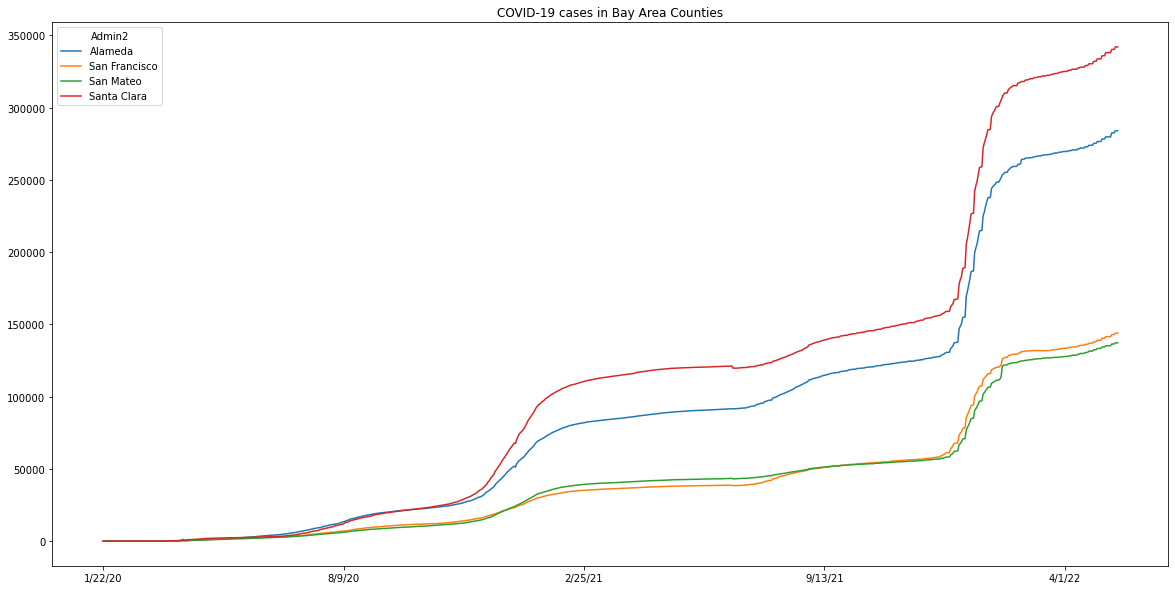

In [20]:
plot = cases_clean[counties].plot(figsize=(20,10))
plot.set_title("COVID-19 cases in Bay Area Counties")

Text(0.5, 1.0, 'COVID-19 deaths in Bay Area Counties')

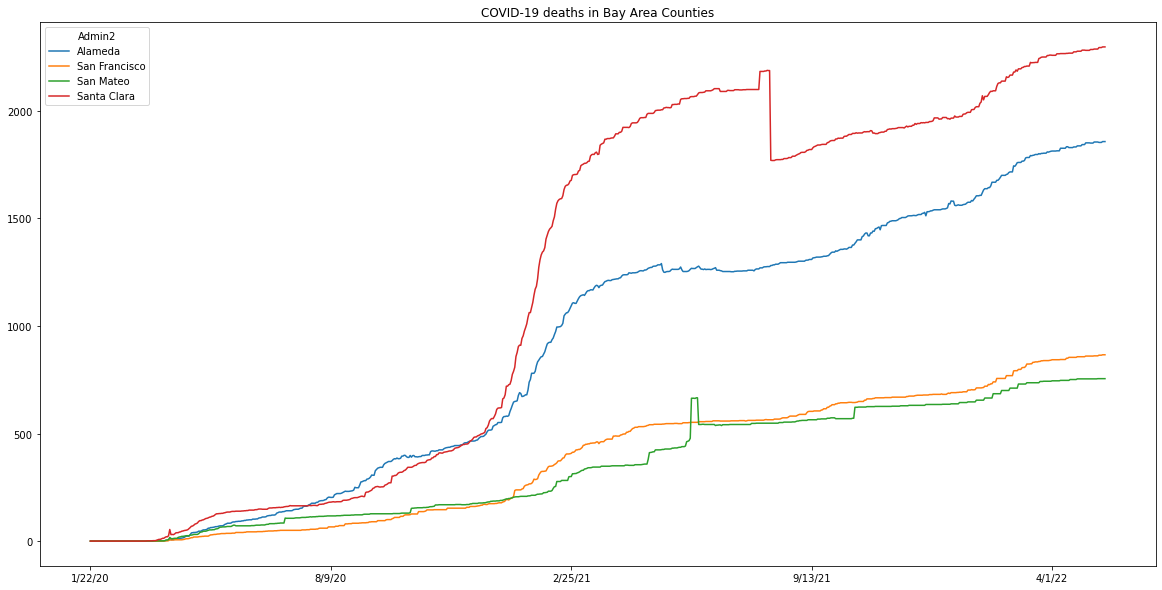

In [31]:
plot = deaths_clean[counties].plot(figsize=(20,10))
plot.set_title("COVID-19 deaths in Bay Area Counties")

Both graphs show a troubling sign, cases and deaths are going up. But it's hard to compare counties since those are absolute numbers not per milion.

## Revisit step 2: including rolling averages of new cases/deaths and data per milion inhabitants

1. Subtract each row by the previous one (to get the increase)
2. Rolling for 7 days
3. Get the average

In [22]:
#diff: difference
cases_diff = cases_clean.diff().rolling(window=7).mean()
deaths_diff = deaths_clean.diff().rolling(window=7).mean()

In [23]:
#pop: population
pop = pd.read_csv('https://gist.githubusercontent.com/NillsF/7923a8c7f27ca98ec75b7e1529f259bb/raw/3bedefbe2e242addba3fb47cbcd239fbed16cd54/california.csv')

In [24]:
pop.head(10)

,CTYNAME,Pop,GrowthRate
0,Los Angeles County,10105518,2.8820
1,San Diego County,3343364,7.7356
2,Orange County,3185968,5.6160
3,Riverside County,2450758,11.3145
4,San Bernardino County,2171603,6.4037
5,Santa Clara County,1937570,8.4818
6,Alameda County,1666753,10.1590
7,Sacramento County,1540975,8.4114
8,Contra Costa County,1150215,9.2780
9,Fresno County,994400,6.6881


In [25]:
#Remove the word county from all columns
pop["CTYNAME"] = pop["CTYNAME"].str.replace(" County", "")

In [26]:
pop.head(10)

,CTYNAME,Pop,GrowthRate
0,Los Angeles,10105518,2.8820
1,San Diego,3343364,7.7356
2,Orange,3185968,5.6160
3,Riverside,2450758,11.3145
4,San Bernardino,2171603,6.4037
5,Santa Clara,1937570,8.4818
6,Alameda,1666753,10.1590
7,Sacramento,1540975,8.4114
8,Contra Costa,1150215,9.2780
9,Fresno,994400,6.6881


In [27]:
#No need for GrowthRate column
pop2 = pop.drop('GrowthRate', axis=1).set_index('CTYNAME')

In [28]:
pop2.head(10)

,Pop
CTYNAME,
Los Angeles,10105518
San Diego,3343364
Orange,3185968
Riverside,2450758
San Bernardino,2171603
Santa Clara,1937570
Alameda,1666753
Sacramento,1540975
Contra Costa,1150215


In [29]:
#Adjust the numbers in the cases and death dataframes:
#pm: per milion 

cases_pm = cases_clean.copy()
for c in pop2.index.tolist():
    cases_pm[c] = cases_pm[c]/pop2.loc[c , : ]['Pop']    
cases_pm = cases_pm*1000000

deaths_pm = deaths_clean.copy()
for c in pop2.index.tolist():
    deaths_pm[c] = deaths_pm[c]/pop2.loc[c , : ]['Pop']
deaths_pm = deaths_pm*1000000

In [30]:
cases_pm_diff = cases_pm.diff().rolling(window=7).mean()
deaths_pm_diff = deaths_pm.diff().rolling(window=7).mean()

Text(0.5, 1.0, '7 day moving avg of new COVID-19 cases')

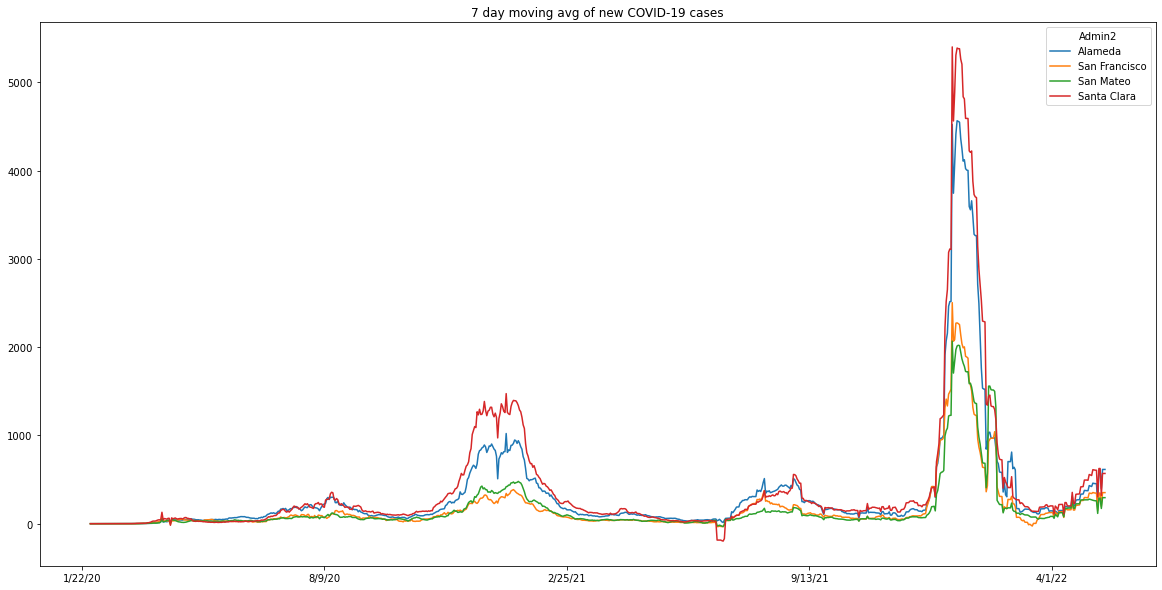

In [31]:
plot = cases_diff[counties].plot(figsize=(20,10))
plot.set_title("7 day moving avg of new COVID-19 cases")

Text(0.5, 1.0, 'Top 10 counties by COVID-19 cases per milion inhabitanys')

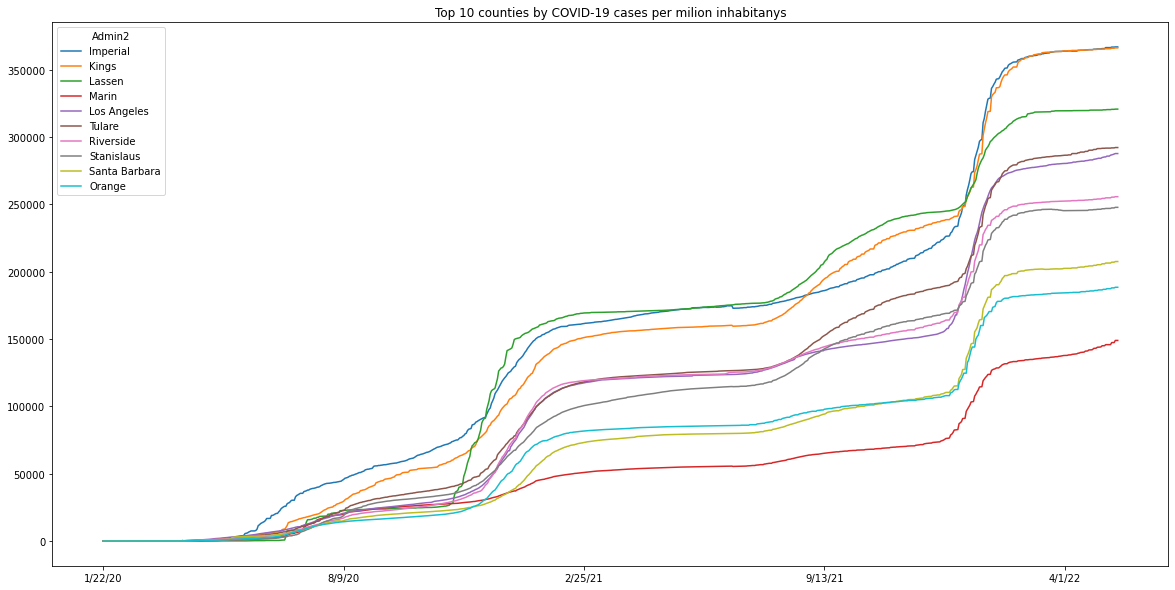

In [26]:
plot = cases_pm.sort_values(axis=1,by='7/20/20',ascending=False).iloc[:, : 10].plot(figsize=(20,10))
plot.set_title("Top 10 counties by COVID-19 cases per milion inhabitanys")

Text(0.5, 1.0, 'Top 10 counties by COVID-19 deaths per milion inhabitanys')

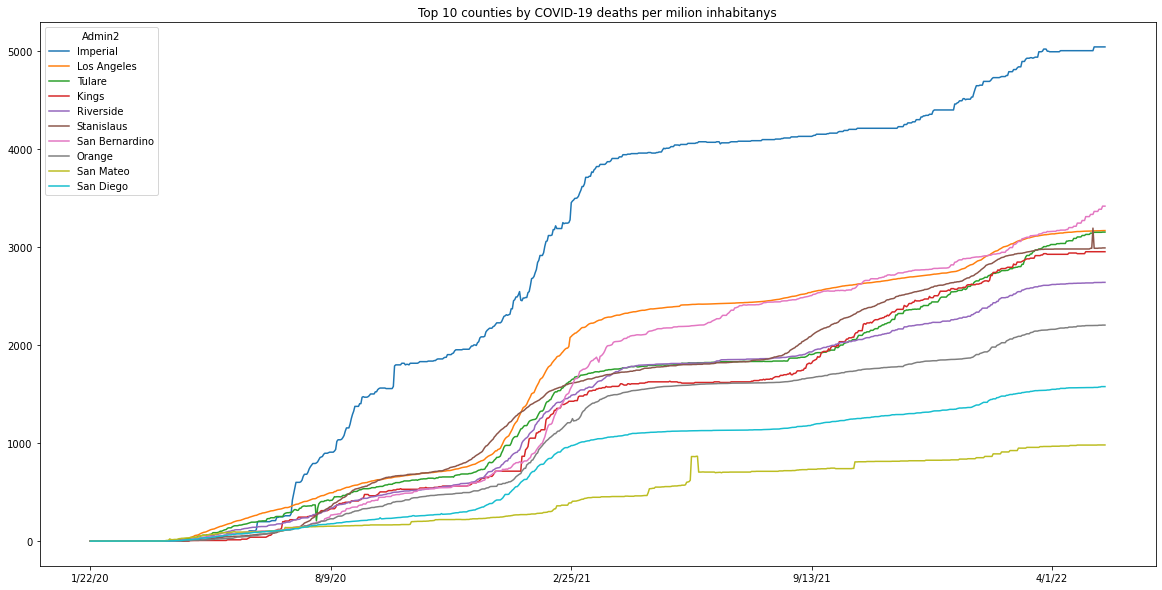

In [27]:
plot = deaths_pm.sort_values(axis=1,by='7/20/20',ascending=False).iloc[:, : 10].plot(figsize=(20,10))
plot.set_title("Top 10 counties by COVID-19 deaths per milion inhabitanys")

Text(0.5, 1.0, 'Top 10 counties by 7 days rolling avg COVID-19 cases per milion inhabitanys')

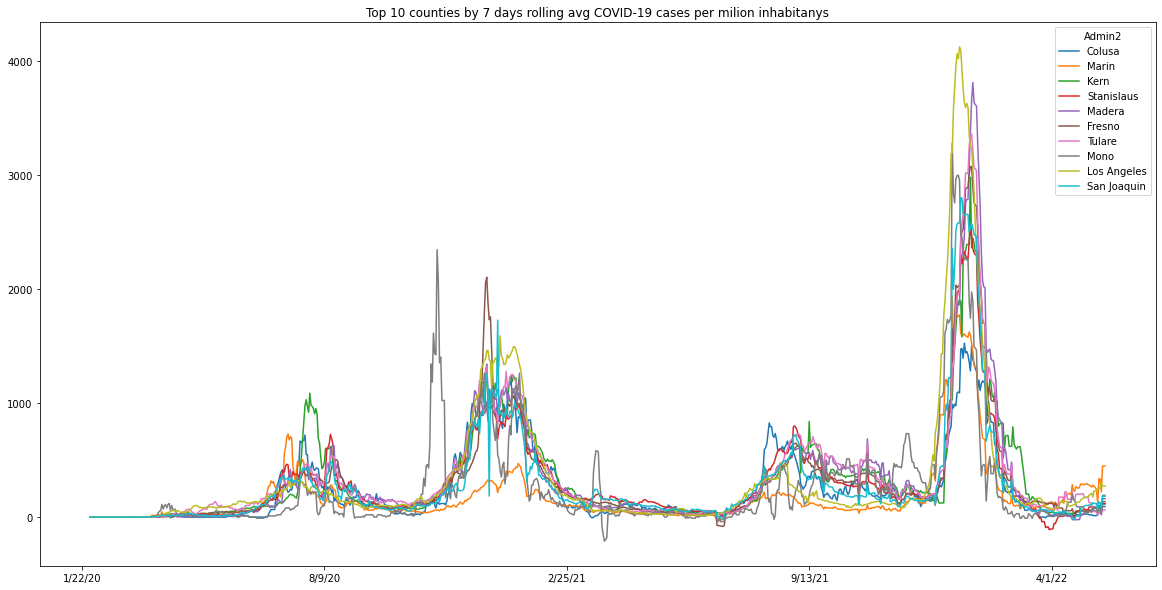

In [28]:
#one final graph we will look at was the top 10 counties by case increases and daily deaths per milion 

plot = cases_pm_diff.sort_values(axis=1,by='7/20/20',ascending=False).iloc[:, : 10].plot(figsize=(20,10))
plot.set_title("Top 10 counties by 7 days rolling avg COVID-19 cases per milion inhabitanys")

Text(0.5, 1.0, 'Top 10 counties by 7 days rolling avg COVID-19 deaths per milion inhabitanys')

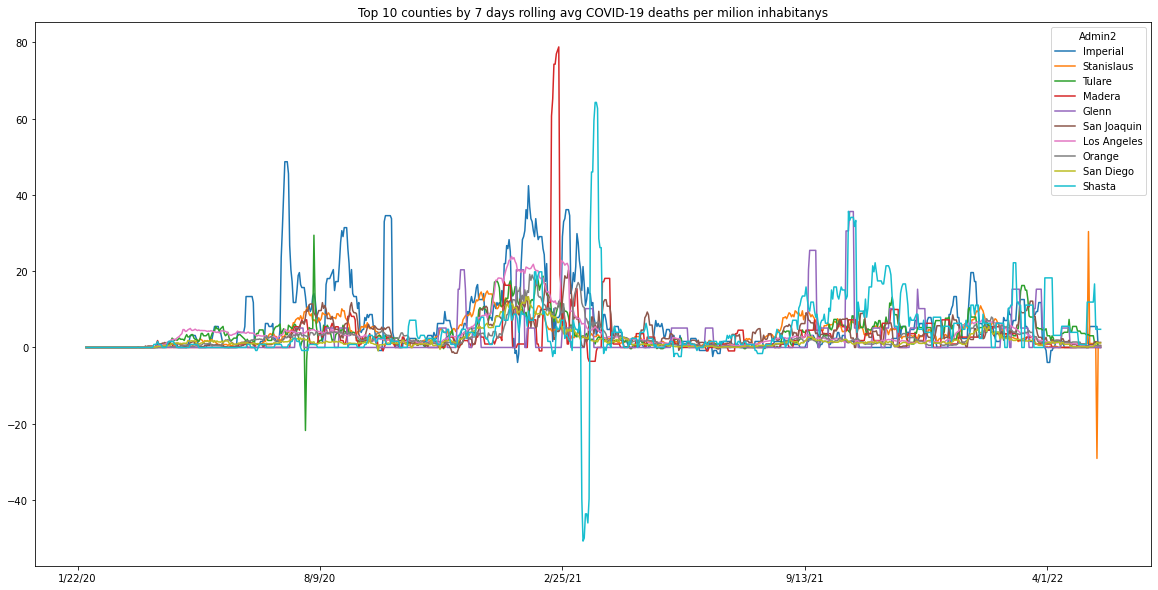

In [29]:
plot = deaths_pm_diff.sort_values(axis=1,by='7/20/20',ascending=False).iloc[:, : 10].plot(figsize=(20,10))
plot.set_title("Top 10 counties by 7 days rolling avg COVID-19 deaths per milion inhabitanys")